In [ ]:
%env OMP_NUM_THREADS = 4

env: OMP_NUM_THREADS=4


In [ ]:
import numpy as np 
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_curve, auc, roc_auc_score, classification_report, confusion_matrix, make_scorer
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

import warnings
warnings.filterwarnings("ignore")

Import dataset

In [ ]:
pd.set_option('display.max_columns', None) 
path = "C:/Users/bodon/Documents/MMA831/Training.csv"

df = pd.read_csv(path, header = 0)


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50006 entries, 0 to 50005
Columns: 707 entries, Unnamed: 0 to indices
dtypes: float64(123), int64(550), object(34)
memory usage: 269.7+ MB


# Target
#0 Visit Website but no action was chosen

#1 All actions excluding download, seminar/webinar, hands-on lab

#2 first action was download

#3 first action was seminar/webinar registration

#4 Hands-on lab was registered after doing one or more actions

#5 hands-on lab was registered before doing one or more actions


#imbalanced dataset


   counts  percentage
0   48670   97.328321
1     777    1.553814
5     446    0.891893
4      85    0.169980
3      19    0.037995
2       9    0.017998


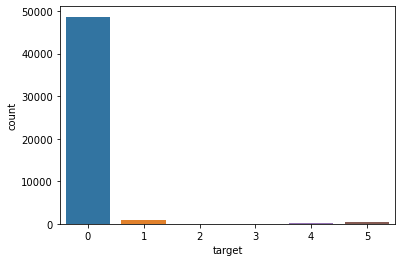

In [ ]:
sns.countplot(x='target',data=df)
#check percentage of target variable
g = df['target']
d = pd.concat([g.value_counts(),              
g.value_counts(normalize=True).mul(100)],axis=1,keys=('counts','percentage'))
print(d)

In [ ]:
g = df['target']
d = pd.concat([g.value_counts(),              
g.value_counts(normalize=True).mul(100)],axis=1,keys=('counts','percentage'))
print(d)

   counts  percentage
0   48670   97.328321
1     777    1.553814
5     446    0.891893
4      85    0.169980
3      19    0.037995
2       9    0.017998


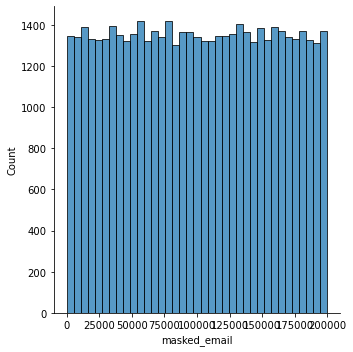

In [ ]:
sns.displot(df, x="masked_email")

[Text(0, 0, 'Residential'),
 Text(1, 0, 'Wireless->Mobile Network'),
 Text(2, 0, 'SOHO'),
 Text(3, 0, 'SMB'),
 Text(4, 0, 'SMB->Software & Technology'),
 Text(5, 0, 'Enterprise Business->Software & Technology'),
 Text(6, 0, 'SMB->Business Services'),
 Text(7, 0, 'Education->University'),
 Text(8, 0, 'SMB->Telecommunications'),
 Text(9, 0, 'SMB->Unclassified')]

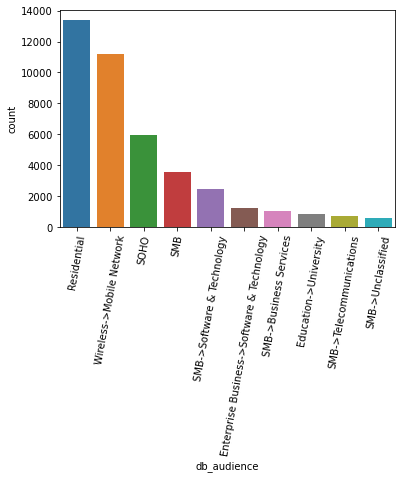

In [ ]:
chart=sns.countplot(x="db_audience", data=df, order=pd.value_counts(df["db_audience"]).iloc[:10].index)
chart.set_xticklabels(chart.get_xticklabels(), rotation=80)

[Text(0, 0, 'Enterprise'),
 Text(1, 0, 'Very Small SMB'),
 Text(2, 0, 'Small SMB'),
 Text(3, 0, 'Commercial'),
 Text(4, 0, 'Medium SMB'),
 Text(5, 0, 'Unknown'),
 Text(6, 0, 'SMB')]

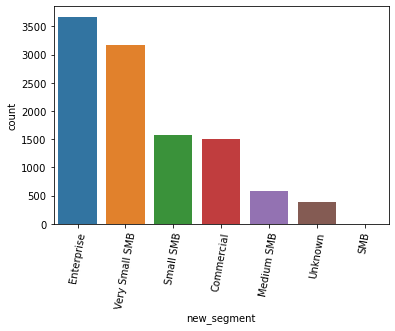

In [ ]:
chart=sns.countplot(x="new_segment", data=df, order=pd.value_counts(df["new_segment"]).iloc[:10].index)
chart.set_xticklabels(chart.get_xticklabels(), rotation=80)

# missing column name id

In [ ]:
df.rename(columns={'Unnamed: 0':'id'}, 
                 inplace=True)
print(df)

           id  tot_page_views  tot_page_views_l30d  tot_page_views_l90d  \
0           3               7                    0                    5   
1           5              16                    0                   16   
2           6               4                    0                    4   
3           8              19                   19                   19   
4          11              12                   12                   12   
...       ...             ...                  ...                  ...   
50001  199981              21                    0                    0   
50002  199982              10                    0                    0   
50003  199986               3                    0                    0   
50004  199989              49                    0                    0   
50005  199999              23                    0                   23   

       tot_visits  tot_visits_l30d  tot_visits_l90d  log_in_events  \
0               3            

In [ ]:
df.info()

In [ ]:
df.count()

id                                    50006
tot_page_views                        50006
tot_page_views_l30d                   50006
tot_page_views_l90d                   50006
tot_visits                            50006
                                      ...  
tgt_first_date_whitepaper_download    50006
tgt_first_date_any_download           50006
tgt_more_than1                        50006
target                                50006
indices                               50006
Length: 707, dtype: int64

#check missing values

In [ ]:
vars_with_na = [var for var in df.columns if df[var].isnull().mean() > 0]
vars_with_na

['db_annualsales',
 'db_city',
 'db_companyname',
 'db_country',
 'db_state',
 'db_employeerange',
 'db_accountwatch',
 'db_audience',
 'db_subindustry',
 'highest_prodA_edition',
 'total_prodT_booking_amount',
 'total_prodT_license_booking_amount',
 'total_prodN_license_booking_amount',
 'total_prodA_std_booking_amount',
 'total_prodA_ent_booking_amount',
 'total_prodA_ent_plus_booking_amount',
 'total_prodA_booking_amount',
 'total_prodA_5_x_booking_amount',
 'total_prodB_booking_amount',
 'total_prodC_booking_amount',
 'total_prodD_booking_amount',
 'total_prodF_booking_amount',
 'total_prodG_booking_amount',
 'total_prodH_booking_amount',
 'total_prodJ_booking_amount',
 'total_prodN_booking_amount',
 'total_prodO_booking_amount',
 'iso_country_dunssite',
 'region_dunssite',
 'geo_dunssite',
 'sic_2_description',
 'sic_4_description',
 'gu_city',
 'gu_state',
 'gu_iso_country_name',
 'gu_country_region',
 'gu_country_geo',
 'gu_annual_sales_usd',
 'gu_num_of_employees',
 'final_vert

In [ ]:
df.isna()

id  tot_page_views  tot_page_views_l30d  tot_page_views_l90d  \
0      False           False                False                False   
1      False           False                False                False   
2      False           False                False                False   
3      False           False                False                False   
4      False           False                False                False   
...      ...             ...                  ...                  ...   
50001  False           False                False                False   
50002  False           False                False                False   
50003  False           False                False                False   
50004  False           False                False                False   
50005  False           False                False                False   

       tot_visits  tot_visits_l30d  tot_visits_l90d  log_in_events  \
0           False            False            False          False   
1           False            False            False          False   
2           False            False            False          False   
3           False            False            False          False   
4           False            False            False          False   
...           ...              ...              ...            ...   
50001       False            False            False          False   
50002       False            False            False          False   
50003       False            False            False          False   
50004       False            False            False          False   
50005       False            False            False          False   

       internal_search_events  internal_campaign_events  find_retailer_events  \
0                       False                     False                 False   
1                       False                     False                 False   
2                       False                     False                 False   
3                       False                     False                 False   
4                       False                     False                 False   
...                       ...                       ...                   ...   
50001                   False                     False                 False   
50002                   False                     False                 False   
50003                   False                     False                 False   
50004                   False                     False                 False   
50005                   False                     False                 False   

       buy_now_events  download_trial_events  contact_support_events  \
0               False                  False                   False   
1               False                  False                   False   
2               False                  False                   False   
3               False                  False                   False   
4               False                  False                   False   
...               ...                    ...                     ...   
50001           False                  False                   False   
50002           False                  False                   False   
50003           False                  False                   False   
50004           False                  False                   False   
50005           False                  False                   False   

       support_search_events  get_pricing_events  find_a_partner_events  \
0                      False               False                  False   
1                      False               False                  False   
2                      False               False                  False   
3                      False               False                  False   
4                      False               False                  F

In [ ]:
#total number of missing value
df.isnull().sum().sum()

2171313

In [ ]:
df[vars_with_na].dtypes

db_annualsales                         float64
db_city                                 object
db_companyname                          object
db_country                              object
db_state                                object
db_employeerange                        object
db_accountwatch                         object
db_audience                             object
db_subindustry                          object
highest_prodA_edition                  float64
total_prodT_booking_amount             float64
total_prodT_license_booking_amount     float64
total_prodN_license_booking_amount     float64
total_prodA_std_booking_amount         float64
total_prodA_ent_booking_amount         float64
total_prodA_ent_plus_booking_amount    float64
total_prodA_booking_amount             float64
total_prodA_5_x_booking_amount         float64
total_prodB_booking_amount             float64
total_prodC_booking_amount             float64
total_prodD_booking_amount             float64
total_prodF_b

In [ ]:
df[vars_with_na].head(10)

db_annualsales     db_city                                 db_companyname  \
0    5.500000e+06       Wuhan                            Emagine Concept Inc   
1             NaN       Depok                      Pt Indonesia Comnets Plus   
2             NaN         NaN                                     SK Telecom   
3             NaN  Khabarovsk                    Pacific National University   
4             NaN       Hebei                            China Telecom hebei   
5             NaN       Delhi                               Airtel Broadband   
6             NaN       Seoul                                            NaN   
7             NaN         NaN                                            NaN   
8             NaN      Aktobe  JSC Kazakhtelecom, Kazakhstan Online Backbone   
9    1.622990e+10     Phoenix                                          Avnet   

  db_country db_state db_employeerange db_accountwatch  \
0         US       CA       Very Small             NaN   
1         ID       30              NaN             NaN   
2         KR      NaN              NaN             NaN   
3         RU       30              NaN             NaN   
4         CN       10              NaN             NaN   
5         IN       07              NaN             NaN   
6         KR       11              NaN             NaN   
7         JP      NaN              NaN             NaN   
8         KZ       04              NaN             NaN   
9         US       AZ       Enterprise             NaN   

                                  db_audience         db_subindustry  \
0                    Wireless->Mobile Network   Equipment & Services   
1                                        SOHO                    NaN   
2                    Wireless->Mobile Network                    NaN   
3                       Education->University             University   
4                    Wireless->Mobile Network                    NaN   
5                    Wireless->Mobile Network                    NaN   
6                                 Residential                    NaN   
7                                 Residential                    NaN   
8                                        SOHO                    NaN   
9  Enterprise Business->Software & Technology  Electrical Components   

   highest_prodA_edition  total_prodT_booking_amount  \
0                    NaN                         NaN   
1                    NaN                         NaN   
2                    NaN                         NaN   
3                    NaN                         NaN   
4                    NaN                         NaN   
5                    7.0                         0.0   
6                    NaN                         NaN   
7                    NaN                         NaN   
8                    NaN                         NaN   
9                    7.0                         0.0   

   total_prodT_license_booking_amount  total_prodN_license_booking_amount  \
0                                 NaN                                 NaN   
1                                 NaN                                 NaN   
2                                 NaN                                 NaN   
3                                 NaN                                 NaN   
4                                 NaN                                 NaN   
5                                 0.0                                 0.0   
6                                 NaN                                 NaN   
7                                 NaN                                 NaN   
8                                 NaN                                 NaN   
9                                 0.0                                 0.0   

   total_prodA_std_booking_amount  total_prodA_ent_booking_amount  \
0                             NaN                             NaN   
1                             NaN                             NaN   
2                 

In [ ]:
#columns with missing values
column_with_nan = df.columns[df.isnull().any()]
column_with_nan

Index(['db_annualsales', 'db_city', 'db_companyname', 'db_country', 'db_state',
       'db_employeerange', 'db_accountwatch', 'db_audience', 'db_subindustry',
       'highest_prodA_edition', 'total_prodT_booking_amount',
       'total_prodT_license_booking_amount',
       'total_prodN_license_booking_amount', 'total_prodA_std_booking_amount',
       'total_prodA_ent_booking_amount', 'total_prodA_ent_plus_booking_amount',
       'total_prodA_booking_amount', 'total_prodA_5_x_booking_amount',
       'total_prodB_booking_amount', 'total_prodC_booking_amount',
       'total_prodD_booking_amount', 'total_prodF_booking_amount',
       'total_prodG_booking_amount', 'total_prodH_booking_amount',
       'total_prodJ_booking_amount', 'total_prodN_booking_amount',
       'total_prodO_booking_amount', 'iso_country_dunssite', 'region_dunssite',
       'geo_dunssite', 'sic_2_description', 'sic_4_description', 'gu_city',
       'gu_state', 'gu_iso_country_name', 'gu_country_region',
       'gu_countr

In [ ]:
#columns with missing values
column_with_nan = df.columns[df.isnull().any()]
for column in column_with_nan:
    print(column, df[column].isnull().sum())

db_annualsales 32101
db_city 8083
db_companyname 12599
db_country 932
db_state 9630
db_employeerange 31609
db_accountwatch 48519
db_audience 954
db_subindustry 28570
highest_prodA_edition 36551
total_prodT_booking_amount 36551
total_prodT_license_booking_amount 36551
total_prodN_license_booking_amount 36551
total_prodA_std_booking_amount 36551
total_prodA_ent_booking_amount 36551
total_prodA_ent_plus_booking_amount 36551
total_prodA_booking_amount 36551
total_prodA_5_x_booking_amount 36551
total_prodB_booking_amount 36551
total_prodC_booking_amount 36551
total_prodD_booking_amount 36551
total_prodF_booking_amount 36551
total_prodG_booking_amount 36551
total_prodH_booking_amount 36551
total_prodJ_booking_amount 36551
total_prodN_booking_amount 36551
total_prodO_booking_amount 36551
iso_country_dunssite 36592
region_dunssite 36592
geo_dunssite 36592
sic_2_description 36610
sic_4_description 36610
gu_city 36656
gu_state 37450
gu_iso_country_name 36590
gu_country_region 36590
gu_country_ge

calculate missing value percentage

In [ ]:
df_na = df[vars_with_na].isnull().mean()
df_na = pd.DataFrame(df_na.reset_index())
df_na.columns = ['Variable', 'Missing Value Percentage']
df_na.sort_values(by='Missing Value Percentage', ascending=False, inplace=True)
df_na

Variable  Missing Value Percentage
56     ftr_first_date_seminar_page_view                  1.000000
42              gu_ind_vmw_major_lookup                  1.000000
43              gu_ind_vmw_sub_category                  1.000000
57     ftr_first_date_webinar_page_view                  0.999540
55        ftr_first_date_eval_page_view                  0.999500
58   ftr_first_date_whitepaper_download                  0.999400
59          ftr_first_date_any_download                  0.979422
54         ftr_first_date_hol_page_view                  0.978243
52           hyperthreading_active_flag                  0.972063
53               hv_replay_capable_flag                  0.972063
6                       db_accountwatch                  0.970264
51                          new_segment                  0.782026
33                             gu_state                  0.748910
39                    final_vertical_gu                  0.740011
32                              gu_city                  0.733032
45              final_vertical_dunssite                  0.732112
31                    sic_4_description                  0.732112
30                    sic_2_description                  0.732112
41                 gu_sic_4_description                  0.731972
37                  gu_annual_sales_usd                  0.731972
40                 gu_sic_2_description                  0.731972
27                 iso_country_dunssite                  0.731752
28                      region_dunssite                  0.731752
29                         geo_dunssite                  0.731752
34                  gu_iso_country_name                  0.731712
35                    gu_country_region                  0.731712
36                       gu_country_geo                  0.731712
38                  gu_num_of_employees                  0.731712
44                       gu_emp_segment                  0.731512
48                 channel_direct_total                  0.730932
47                    channel_web_total                  0.730932
46                    channel_oem_total                  0.730932
49                channel_partner_total                  0.730932
50                channel_support_total                  0.730932
10           total_prodT_booking_amount                  0.730932
11   total_prodT_license_booking_amount                  0.730932
12   total_prodN_license_booking_amount                  0.730932
13       total_prodA_std_booking_amount                  0.730932
9                 highest_prodA_edition                  0.730932
18           total_prodB_booking_amount                  0.730932
14       total_prodA_ent_booking_amount                  0.730932
19           total_prodC_booking_amount                  0.730932
24           total_prodJ_booking_amount                  0.730932
20           total_prodD_booking_amount                  0.730932
21           total_prodF_booking_amount                  0.730932
15  total_prodA_ent_plus_booking_amount                  0.730932
23           total_prodH_booking_amount                  0.730932
22           total_prodG_booking_amount                  0.730932
25           total_prodN_booking_amount                  0.730932
26           total_prodO_booking_amount                  0.730932
17       total_prodA_5_x_booking_amount                  0.730932
16           total_prodA_booking_amount                  0.730932
0                        db_annualsales                  0.641943
5                      db_employeerange                  0.632104
8                        db_subindustry                  0.571331
2                        db_companyname                  0.251950
4                              db_state                  0.192577
1                               db_city                  0.161641
7                           db_audience                  0.019078
3                            db_country                  0.018638

# IMPORT 20% of dataset

In [ ]:
pd.set_option('display.max_columns', None) 
path = "C:/Users/bodon/Documents/MMA831/df_frac_original 20%.csv"

df_frac = pd.read_csv(path, header = 0)

# 1. many columns only have value 0

remove the columns only have value zero

In [ ]:
df_frac== 0

Unnamed: 0     id  tot_page_views  tot_page_views_l30d  \
0           False  False           False                 True   
1           False  False           False                False   
2           False  False           False                False   
3           False  False           False                 True   
4           False  False           False                 True   
...           ...    ...             ...                  ...   
9996        False  False           False                 True   
9997        False  False           False                 True   
9998        False  False           False                False   
9999        False  False           False                 True   
10000       False  False           False                False   

       tot_page_views_l90d  tot_visits  tot_visits_l30d  tot_visits_l90d  \
0                     True       False             True             True   
1                    False       False            False            False   
2                    False       False            False            False   
3                    False       False             True            False   
4                     True       False             True             True   
...                    ...         ...              ...              ...   
9996                  True       False             True             True   
9997                  True       False             True             True   
9998                 False       False            False            False   
9999                  True       False             True             True   
10000                False       False            False            False   

       log_in_events  internal_search_events  internal_campaign_events  \
0              False                    True                      True   
1              False                   False                      True   
2              False                   False                      True   
3              False                    True                      True   
4              False                    True                      True   
...              ...                     ...                       ...   
9996           False                    True                      True   
9997           False                    True                      True   
9998           False                   False                      True   
9999           False                    True                      True   
10000          False                   False                      True   

       find_retailer_events  buy_now_events  download_trial_events  \
0                      True            True                   True   
1                      True            True                   True   
2                      True            True                   True   
3                      True            True                   True   
4                      True           False                  False   
...                     ...             ...                    ...   
9996                   True            True                   True   
9997                   True            True                   True   
9998                   True            True                   True   
9999                   True            True                  False   
10000                  True            True                  False   

       contact_support_events  support_search_events  get_pricing_events  \
0                        True                   True                True   
1                        True                   True                True   
2                        True                   True                True   
3                        True                   True                True   
4                        True                   True               False   
...                       ...                    ...                 ...   
9996                     True                   Tru

In [ ]:

df_frac.loc[:, (df_frac== 0).all(axis=0)]

survey_submit_events  tot_bing_se_page_views  tot_msn_se_page_views  \
0                         0                       0                      0   
1                         0                       0                      0   
2                         0                       0                      0   
3                         0                       0                      0   
4                         0                       0                      0   
...                     ...                     ...                    ...   
9996                      0                       0                      0   
9997                      0                       0                      0   
9998                      0                       0                      0   
9999                      0                       0                      0   
10000                     0                       0                      0   

       tot_altavista_se_page_views  tot_excite_se_page_views  \
0                                0                         0   
1                                0                         0   
2                                0                         0   
3                                0                         0   
4                                0                         0   
...                            ...                       ...   
9996                             0                         0   
9997                             0                         0   
9998                             0                         0   
9999                             0                         0   
10000                            0                         0   

       tot_lycos_se_page_views  tot_prod1_overview_page_views  \
0                            0                              0   
1                            0                              0   
2                            0                              0   
3                            0                              0   
4                            0                              0   
...                        ...                            ...   
9996                         0                              0   
9997                         0                              0   
9998                         0                              0   
9999                         0                              0   
10000                        0                              0   

       tot_prod4_overview_page_views  tot_prod6_overview_page_views  \
0                                  0                              0   
1                                  0                              0   
2                                  0                              0   
3                                  0                              0   
4                                  0                              0   
...                              ...                            ...   
9996                               0                              0   
9997                               0                              0   
9998                               0                              0   
9999                               0                              0   
10000                              0                              0   

       tot_prod8_overview_page_views  tot_prod9_overview_page_views  \
0                                  0                              0   
1                                  0                              0   
2                                  0                              0   
3                                  0                              0   
4                                  0                              0   
...                              ...                            ...   
9996                               0                              0   
9997                               0                              0   
9998                        

In [ ]:

df2=df_frac.loc[:, (df_frac != 0).any(axis=0)]
df2

Unnamed: 0      id  tot_page_views  tot_page_views_l30d  \
0           48630  194487               5                    0   
1           47973  191915              77                   10   
2           28461  113789             340                    2   
3           35340  141075              38                    0   
4           32716  130913              64                    0   
...           ...     ...             ...                  ...   
9996        14290   57122              15                    0   
9997        34228  136625              16                    0   
9998        47113  188380              39                   23   
9999         7169   28771              38                    0   
10000       33948  135556            1901                  695   

       tot_page_views_l90d  tot_visits  tot_visits_l30d  tot_visits_l90d  \
0                        0           1                0                0   
1                       77          10                1               10   
2                       53          56                2               14   
3                        7           6                0                3   
4                        0           3                0                0   
...                    ...         ...              ...              ...   
9996                     0           4                0                0   
9997                     0           2                0                0   
9998                    39          11               10               11   
9999                     0          12                0                0   
10000                 1466         276               79              205   

       log_in_events  internal_search_events  internal_campaign_events  \
0                  5                       0                         0   
1                 69                       7                         0   
2                317                       7                         0   
3                 30                       0                         0   
4                 55                       0                         0   
...              ...                     ...                       ...   
9996              14                       0                         0   
9997              16                       0                         0   
9998              35                       2                         0   
9999              37                       0                         0   
10000           1789                       4                         0   

       find_retailer_events  buy_now_events  download_trial_events  \
0                         0               0                      0   
1                         0               0                      0   
2                         0               0                      0   
3                         0               0                      0   
4                         0               3                      6   
...                     ...             ...                    ...   
9996                      0               0                      0   
9997                      0               0                      0   
9998                      0               0                      0   
9999                      0               0                      5   
10000                     0               0                     10   

       contact_support_events  support_search_events  get_pricing_events  \
0                           0                      0                   0   
1                           0                      0                   0   
2                           0                      0                   0   
3                           0                      0                   0   
4                           0                      0                   1   
...                       ...                    ...                 ...   
9996                        0          

# 2. missing values -three columns have values NA
- ftr_first_date_seminar_page_view	
- gu_ind_vmw_major_lookup
- gu_ind_vmw_sub_category

missing values completely

In [ ]:
df3 = df2.drop(['ftr_first_date_seminar_page_view','gu_ind_vmw_major_lookup','gu_ind_vmw_sub_category'], axis=1)

In [ ]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10001 entries, 0 to 10000
Columns: 570 entries, Unnamed: 0 to indices
dtypes: float64(120), int64(416), object(34)
memory usage: 43.5+ MB


# 3 Columns only have 9999 value

- days_since_last_prodX_purchase_date
- days_since_first_prodX_purchase_date
- days_since_first_prodP_purchase_date
- days_since_last_prodP_purchase_date
- days_since_last_prodS_purchase_date 
- days_since_first_prodS_purchase_date
- days_bw_prodX_launch_and_purch
- days_bw_prodP_launch_and_purch
- days_bw_prodS_launch_and_purch

9 columns only have 9999 value

In [ ]:
df['days_since_last_prodX_purchase_date'].value_counts()

9999    50006
Name: days_since_last_prodX_purchase_date, dtype: int64

In [ ]:
df['days_since_first_prodX_purchase_date'].value_counts()

9999    50006
Name: days_since_first_prodX_purchase_date, dtype: int64

In [ ]:
df['days_since_first_prodP_purchase_date'].value_counts()

9999    50006
Name: days_since_first_prodP_purchase_date, dtype: int64

In [ ]:
df['days_since_last_prodP_purchase_date'].value_counts()

9999    50006
Name: days_since_last_prodP_purchase_date, dtype: int64

In [ ]:
df['days_since_last_prodS_purchase_date'].value_counts()

9999    50006
Name: days_since_last_prodS_purchase_date, dtype: int64

In [ ]:
df['days_since_first_prodS_purchase_date'].value_counts()

9999    50006
Name: days_since_first_prodS_purchase_date, dtype: int64

In [ ]:
df['days_bw_prodX_launch_and_purch'].value_counts()

9999    50006
Name: days_bw_prodX_launch_and_purch, dtype: int64

In [ ]:
df['days_bw_prodP_launch_and_purch'].value_counts()

9999    50006
Name: days_bw_prodP_launch_and_purch, dtype: int64

In [ ]:
df['days_bw_prodS_launch_and_purch'].value_counts()

9999    50006
Name: days_bw_prodS_launch_and_purch, dtype: int64

In [ ]:
#drop 9 columns - 577 columns left
df4 = df3.drop(['days_since_last_prodX_purchase_date','days_since_first_prodX_purchase_date','days_since_first_prodP_purchase_date',
               'days_since_last_prodP_purchase_date','days_since_first_prodS_purchase_date','days_since_last_prodS_purchase_date',
               'days_bw_prodX_launch_and_purch','days_bw_prodP_launch_and_purch','days_bw_prodS_launch_and_purch'], axis=1)

In [ ]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10001 entries, 0 to 10000
Columns: 561 entries, Unnamed: 0 to indices
dtypes: float64(120), int64(407), object(34)
memory usage: 42.8+ MB


# Remove Columns only contain 1

In [ ]:
df['flag_train'].value_counts()

1    50006
Name: flag_train, dtype: int64

In [ ]:
df['indices'].value_counts()

1    50006
Name: indices, dtype: int64

In [ ]:
df5 = df4.drop(['flag_train','indices'], axis=1)

In [ ]:
df5.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10001 entries, 0 to 10000
Columns: 559 entries, Unnamed: 0 to target
dtypes: float64(120), int64(405), object(34)
memory usage: 42.7+ MB


In [ ]:
#https://stackoverflow.com/questions/17778394/list-highest-correlation-pairs-from-a-large-correlation-matrix-in-pandas
def corrFilter(x: pd.DataFrame, bound: float):
    xCorr = x.corr()
    xFiltered = xCorr[((xCorr >= bound) | (xCorr <= -bound)) & (xCorr !=1.000)]
    xFlattened = xFiltered.unstack().sort_values().drop_duplicates()
    return xFlattened

corrFilter(df5, .7)

days_since_last_prodU_purchase_date           flag_prodU_customer                           -0.999958
days_since_first_prodU_purchase_date          flag_prodU_customer                           -0.999955
days_bw_prodU_launch_and_purch                flag_prodU_customer                           -0.999952
flag_prod21_customer                          days_since_last_prod21_purchase_date          -0.999930
flag_prodM_customer                           days_since_last_prodM_purchase_date           -0.999917
                                                                                               ...   
days_since_first_prodN_license_purchase_date  days_since_last_prodN_license_purchase_date    0.999967
days_since_first_prodT_license_purchase_date  days_since_last_prodT_license_purchase_date    0.999974
days_since_last_prodU_purchase_date           days_since_first_prodU_purchase_date           0.999991
tot_page_views                                checkout_s1_events                  

In [ ]:
cormat = df5.corr()
round(cormat,2)

id  tot_page_views  tot_page_views_l30d  \
id                                  1.00            0.00                 0.00   
tot_page_views                      0.00            1.00                 0.94   
tot_page_views_l30d                 0.00            0.94                 1.00   
tot_page_views_l90d                 0.00            0.99                 0.96   
tot_visits                          0.00            0.99                 0.91   
...                                  ...             ...                  ...   
tgt_first_date_webinar_page_view   -0.00            0.02                 0.01   
tgt_first_date_whitepaper_download -0.00            0.06                 0.07   
tgt_first_date_any_download         0.01            0.14                 0.16   
tgt_more_than1                     -0.00            0.09                 0.09   
target                              0.00            0.08                 0.09   

                                    tot_page_views_l90d  tot_visits  \
id                                                 0.00        0.00   
tot_page_views                                     0.99        0.99   
tot_page_views_l30d                                0.96        0.91   
tot_page_views_l90d                                1.00        0.97   
tot_visits                                         0.97        1.00   
...                                                 ...         ...   
tgt_first_date_webinar_page_view                   0.01        0.01   
tgt_first_date_whitepaper_download                 0.07        0.05   
tgt_first_date_any_download                        0.14        0.12   
tgt_more_than1                                     0.09        0.08   
target                                             0.08        0.07   

                                    tot_visits_l30d  tot_visits_l90d  \
id                                             0.00             0.00   
tot_page_views                                 0.98             0.99   
tot_page_views_l30d                            0.94             0.92   
tot_page_views_l90d                            0.98             0.98   
tot_visits                                     0.98             0.99   
...                                             ...              ...   
tgt_first_date_webinar_page_view               0.01             0.01   
tgt_first_date_whitepaper_download             0.06             0.06   
tgt_first_date_any_download                    0.14             0.13   
tgt_more_than1                                 0.09             0.09   
target                                         0.08             0.07   

                                    log_in_events  internal_search_events  \
id                                           0.00                    0.01   
tot_page_views                               1.00                    0.89   
tot_page_views_l30d                          0.94                    0.81   
tot_page_views_l90d                          0.99                    0.87   
tot_visits                                   0.98                    0.91   
...                                           ...                     ...   
tgt_first_date_webinar_page_view             0.02                    0.00   
tgt_first_date_whitepaper_download           0.06                    0.04   
tgt_first_date_any_download                  0.14                    0.09   
tgt_more_than1                               0.09                    0.05   
target                                       0.08                    0.05   

                                    internal_campaign_events  \
id                                                     -0.00   
tot_page_views                                          0.26   
tot_page_views_l30d                                     0.25   
tot_page_views_l90d                                     0.24   
tot_visits                                              0.23   
...                                   

# Remove missing values higher than 70%

#total 49 columns

In [ ]:
df6 = df5.drop([
       'db_accountwatch',
       'highest_prodA_edition', 'total_prodT_booking_amount',
       'total_prodT_license_booking_amount',
       'total_prodN_license_booking_amount', 'total_prodA_std_booking_amount',
       'total_prodA_ent_booking_amount', 'total_prodA_ent_plus_booking_amount',
       'total_prodA_booking_amount', 'total_prodA_5_x_booking_amount',
       'total_prodB_booking_amount', 'total_prodC_booking_amount',
       'total_prodD_booking_amount', 'total_prodF_booking_amount',
       'total_prodG_booking_amount', 'total_prodH_booking_amount',
       'total_prodJ_booking_amount', 'total_prodN_booking_amount',
       'total_prodO_booking_amount', 'iso_country_dunssite', 'region_dunssite',
       'geo_dunssite', 'sic_2_description', 'sic_4_description', 'gu_city',
       'gu_state', 'gu_iso_country_name', 'gu_country_region',
       'gu_country_geo', 'gu_annual_sales_usd', 'gu_num_of_employees',
       'final_vertical_gu', 'gu_sic_2_description', 'gu_sic_4_description',
       'gu_emp_segment',
       'final_vertical_dunssite', 'channel_oem_total', 'channel_web_total',
       'channel_direct_total', 'channel_partner_total',
       'channel_support_total', 'new_segment', 'hyperthreading_active_flag',
       'hv_replay_capable_flag', 'ftr_first_date_hol_page_view',
       'ftr_first_date_eval_page_view',
       'ftr_first_date_webinar_page_view',
       'ftr_first_date_whitepaper_download', 'ftr_first_date_any_download'], axis=1)

In [ ]:
for col in df6.columns:
    print(col)

Unnamed: 0
id
tot_page_views
tot_page_views_l30d
tot_page_views_l90d
tot_visits
tot_visits_l30d
tot_visits_l90d
log_in_events
internal_search_events
internal_campaign_events
find_retailer_events
buy_now_events
download_trial_events
contact_support_events
support_search_events
get_pricing_events
find_a_partner_events
form_success_events
form_abandon_events
product_view_events
cart_open_events
cart_add_events
cart_remove_events
cart_view_events
campaign_view_events
checkout_s1_events
purchase_events
survey_display_events
paid_search_events
natural_search_events
video_view_events
campaign_src_events
file_download_events
tot_google_browser_page_views
tot_mozilla_browser_page_views
tot_microsoft_browser_page_views
tot_apple_browser_page_views
tot_opera_browser_page_views
tot_other_browser_page_views
tot_internal_ref_page_views
tot_search_engine_ref_page_views
tot_email_ref_page_views
tot_social_media_ref_page_views
tot_other_ref_page_views
tot_prodQ_os_page_views
tot_android_page_views
tot_

In [ ]:
vars_with_na_numeric = [var for var in df6.columns if df6[var].isnull().mean() > 0]
vars_with_na_numeric

['db_annualsales',
 'db_city',
 'db_companyname',
 'db_country',
 'db_state',
 'db_employeerange',
 'db_audience',
 'db_subindustry']

In [ ]:
df6.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50006 entries, 0 to 50005
Columns: 526 entries, id to target
dtypes: float64(95), int64(421), object(10)
memory usage: 200.7+ MB


In [ ]:
df6.corr()

id  tot_page_views  \
id                                  1.000000        0.002888   
tot_page_views                      0.002888        1.000000   
tot_page_views_l30d                 0.001994        0.938714   
tot_page_views_l90d                 0.003024        0.988052   
tot_visits                          0.003881        0.989304   
...                                      ...             ...   
tgt_first_date_webinar_page_view   -0.001534        0.015916   
tgt_first_date_whitepaper_download -0.002234        0.059094   
tgt_first_date_any_download         0.009624        0.135955   
tgt_more_than1                     -0.000130        0.088811   
target                              0.004318        0.078048   

                                    tot_page_views_l30d  tot_page_views_l90d  \
id                                             0.001994             0.003024   
tot_page_views                                 0.938714             0.988052   
tot_page_views_l30d                            1.000000             0.962072   
tot_page_views_l90d                            0.962072             1.000000   
tot_visits                                     0.908949             0.974702   
...                                                 ...                  ...   
tgt_first_date_webinar_page_view               0.012804             0.010825   
tgt_first_date_whitepaper_download             0.074409             0.068715   
tgt_first_date_any_download                    0.155781             0.144020   
tgt_more_than1                                 0.088966             0.093181   
target                                         0.086784             0.080599   

                                    tot_visits  tot_visits_l30d  \
id                                    0.003881         0.003559   
tot_page_views                        0.989304         0.978774   
tot_page_views_l30d                   0.908949         0.942299   
tot_page_views_l90d                   0.974702         0.980138   
tot_visits                            1.000000         0.980964   
...                                        ...              ...   
tgt_first_date_webinar_page_view      0.014165         0.012013   
tgt_first_date_whitepaper_download    0.050289         0.060554   
tgt_first_date_any_download           0.121007         0.138120   
tgt_more_than1                        0.083833         0.089024   
target                                0.068876         0.076437   

                                    tot_visits_l90d  log_in_events  \
id                                         0.004019       0.002101   
tot_page_views                             0.985812       0.995813   
tot_page_views_l30d                        0.921659       0.942474   
tot_page_views_l90d                        0.983421       0.986602   
tot_visits                                 0.994417       0.979582   
...                                             ...            ...   
tgt_first_date_webinar_page_view           0.009422       0.017022   
tgt_first_date_whitepaper_download         0.056188       0.062104   
tgt_first_date_any_download                0.126036       0.138244   
tgt_more_than1                             0.086954       0.093673   
target                                     0.069745       0.080735   

                                    internal_search_events  \
id                                                0.005488   
tot_page_views                                    0.894946   
tot_page_views_l30d                               0.805191   
tot_page_views_l90d                               0.868233   
tot_visits                                        0.905252   
...                                                    ...   
tgt_first_date_webinar_page_view                  0.004920   
tgt_first_date_whitepaper_download                0.037295   
tgt_first_date_any_download                       0.094937   
tgt_more_than1                                

SyntaxError: EOL while scanning string literal (<ipython-input-1-a750103ce6b5>, line 1)

# 3. Missing values - create surrogates and fixing categoricals - Unknown

In [ ]:
# creating surrogates
for col in df6:
    if df6[col].isna().sum() != 0: 
        df6[col + '_surrogate'] = df6[col].isna().astype(int)

# fixing categoricals
imputer = SimpleImputer(missing_values = np.nan, strategy='constant')
imputer.fit(df6.select_dtypes(exclude=['int64','float64']))
df6[df6.select_dtypes(exclude=['int64','float64']).columns] = imputer.transform(df6.select_dtypes(exclude=['int64','float64']))

In [ ]:
data=df6.replace('missing_value','Unknown')
data.head()

Unnamed: 0      id  tot_page_views  tot_page_views_l30d  \
0       48630  194487               5                    0   
1       47973  191915              77                   10   
2       28461  113789             340                    2   
3       35340  141075              38                    0   
4       32716  130913              64                    0   

   tot_page_views_l90d  tot_visits  tot_visits_l30d  tot_visits_l90d  \
0                    0           1                0                0   
1                   77          10                1               10   
2                   53          56                2               14   
3                    7           6                0                3   
4                    0           3                0                0   

   log_in_events  internal_search_events  internal_campaign_events  \
0              5                       0                         0   
1             69                       7                         0   
2            317                       7                         0   
3             30                       0                         0   
4             55                       0                         0   

   find_retailer_events  buy_now_events  download_trial_events  \
0                     0               0                      0   
1                     0               0                      0   
2                     0               0                      0   
3                     0               0                      0   
4                     0               3                      6   

   contact_support_events  support_search_events  get_pricing_events  \
0                       0                      0                   0   
1                       0                      0                   0   
2                       0                      0                   0   
3                       0                      0                   0   
4                       0                      0                   1   

   find_a_partner_events  form_success_events  form_abandon_events  \
0                      0                    0                    0   
1                      0                    2                    1   
2                      0                    0                    0   
3                      0                    0                    0   
4                      0                    1                    0   

   product_view_events  cart_open_events  cart_add_events  cart_remove_events  \
0                    5                 0                0                   0   
1                   77                 0                0                   0   
2                  347                 0                0                   0   
3                   41                 1                0                   0   
4                   65                 2                1                   0   

   cart_view_events  campaign_view_events  checkout_s1_events  \
0                 0                     0                   5   
1                 0                     2                  77   
2                 5                     3                 340   
3                 2                     0                  39   
4                 0                     0                  64   

   purchase_events  survey_display_events  paid_search_events  \
0                5                      0                   0   
1               77                      0                   0   
2              371                      0                   0   
3               43                      0                   0   
4               65                      0                   0   

   natural_search_events  video_view_events  campaign_src_events  \
0                      0                  0                    0   
1                      6                  0                    0   
2                     35                  5         

In [ ]:
data.isnull().sum().sum()

6395

# 4. Missing values - fixing Numerical variables - replace with Median

In [ ]:
# fixing numericals 
data_fix=data.fillna(data.median())
data_fix

Unnamed: 0      id  tot_page_views  tot_page_views_l30d  \
0           48630  194487               5                    0   
1           47973  191915              77                   10   
2           28461  113789             340                    2   
3           35340  141075              38                    0   
4           32716  130913              64                    0   
...           ...     ...             ...                  ...   
9996        14290   57122              15                    0   
9997        34228  136625              16                    0   
9998        47113  188380              39                   23   
9999         7169   28771              38                    0   
10000       33948  135556            1901                  695   

       tot_page_views_l90d  tot_visits  tot_visits_l30d  tot_visits_l90d  \
0                        0           1                0                0   
1                       77          10                1               10   
2                       53          56                2               14   
3                        7           6                0                3   
4                        0           3                0                0   
...                    ...         ...              ...              ...   
9996                     0           4                0                0   
9997                     0           2                0                0   
9998                    39          11               10               11   
9999                     0          12                0                0   
10000                 1466         276               79              205   

       log_in_events  internal_search_events  internal_campaign_events  \
0                  5                       0                         0   
1                 69                       7                         0   
2                317                       7                         0   
3                 30                       0                         0   
4                 55                       0                         0   
...              ...                     ...                       ...   
9996              14                       0                         0   
9997              16                       0                         0   
9998              35                       2                         0   
9999              37                       0                         0   
10000           1789                       4                         0   

       find_retailer_events  buy_now_events  download_trial_events  \
0                         0               0                      0   
1                         0               0                      0   
2                         0               0                      0   
3                         0               0                      0   
4                         0               3                      6   
...                     ...             ...                    ...   
9996                      0               0                      0   
9997                      0               0                      0   
9998                      0               0                      0   
9999                      0               0                      5   
10000                     0               0                     10   

       contact_support_events  support_search_events  get_pricing_events  \
0                           0                      0                   0   
1                           0                      0                   0   
2                           0                      0                   0   
3                           0                      0                   0   
4                           0                      0                   1   
...                       ...                    ...                 ...   
9996                        0          

In [ ]:
vars_with_na_numeric = [var for var in data_fix.columns if data_fix[var].isnull().mean() > 0]
vars_with_na_numeric

[]

In [ ]:
pd.isnull(data_fix).sum().sum()

0

In [ ]:
from pandas_profiling import ProfileReport


profile = ProfileReport(data_fix,minimal=True)
profile.to_file(output_file="output_data_fix.html")

# combine categorical levels

In [ ]:
data_fix['db_industry'].value_counts()

Unknown    5664
28         1335
29          475
7           355
10          302
12          263
20          243
32          206
17          143
15          126
27          119
8            94
31           90
11           66
13           66
5            62
24           55
25           44
23           42
3            34
21           33
26           31
9            27
4            23
6            22
19           18
14           16
1            14
30            8
22            7
16            6
2             6
18            6
Name: db_industry, dtype: int64

In [ ]:
data_fix['db_city'].value_counts()

Unknown                 1624
Tokyo                    270
San Jose                 132
London                   130
Taipei                    90
                        ... 
Groot-bijgaarden           1
Moraine                    1
Mexicali                   1
Bucuresti Sectorul 2       1
Alpharetta                 1
Name: db_city, Length: 3189, dtype: int64

In [ ]:
data_fix['db_companyname'].value_counts()

Unknown                                              2464
Deutsche Telekom AG                                   159
Zscaler Inc                                           115
Orange                                                 84
Hinet Ltd                                              79
                                                     ... 
General Dynamics Advanced Information Systems Inc       1
Agfa-Gevaert NV                                         1
ADES BV                                                 1
Hipskind Technology Solutions Group Inc                 1
Health Alliance Plan of Michigan Hap                    1
Name: db_companyname, Length: 4295, dtype: int64

In [ ]:
data_fix['db_country'].value_counts()

US    3174
DE     551
GB     506
JP     488
CN     450
      ... 
A1       1
MP       1
SL       1
TJ       1
NP       1
Name: db_country, Length: 148, dtype: int64

In [ ]:
data_fix['db_state'].value_counts()

Unknown    1938
CA          484
TX          290
07          240
40          238
           ... 
NIZ           1
D3            1
GAT           1
LCE           1
BNS           1
Name: db_state, Length: 456, dtype: int64

In [ ]:
def CombineRareCategories(data_clean, mincount):
    for col in data_fix.columns:
        if (type(data_fix[col][0]) == str):
            for index, row in pd.DataFrame(data_fix[col].value_counts()).iterrows():
                if ( row[0] < mincount):
                    data_fix[col].replace(index, 'Other_' + col, inplace = True)
                else:
                    None

In [ ]:
data_fix.head()

Unnamed: 0      id  tot_page_views  tot_page_views_l30d  \
0       48630  194487               5                    0   
1       47973  191915              77                   10   
2       28461  113789             340                    2   
3       35340  141075              38                    0   
4       32716  130913              64                    0   

   tot_page_views_l90d  tot_visits  tot_visits_l30d  tot_visits_l90d  \
0                    0           1                0                0   
1                   77          10                1               10   
2                   53          56                2               14   
3                    7           6                0                3   
4                    0           3                0                0   

   log_in_events  internal_search_events  internal_campaign_events  \
0              5                       0                         0   
1             69                       7                         0   
2            317                       7                         0   
3             30                       0                         0   
4             55                       0                         0   

   find_retailer_events  buy_now_events  download_trial_events  \
0                     0               0                      0   
1                     0               0                      0   
2                     0               0                      0   
3                     0               0                      0   
4                     0               3                      6   

   contact_support_events  support_search_events  get_pricing_events  \
0                       0                      0                   0   
1                       0                      0                   0   
2                       0                      0                   0   
3                       0                      0                   0   
4                       0                      0                   1   

   find_a_partner_events  form_success_events  form_abandon_events  \
0                      0                    0                    0   
1                      0                    2                    1   
2                      0                    0                    0   
3                      0                    0                    0   
4                      0                    1                    0   

   product_view_events  cart_open_events  cart_add_events  cart_remove_events  \
0                    5                 0                0                   0   
1                   77                 0                0                   0   
2                  347                 0                0                   0   
3                   41                 1                0                   0   
4                   65                 2                1                   0   

   cart_view_events  campaign_view_events  checkout_s1_events  \
0                 0                     0                   5   
1                 0                     2                  77   
2                 5                     3                 340   
3                 2                     0                  39   
4                 0                     0                  64   

   purchase_events  survey_display_events  paid_search_events  \
0                5                      0                   0   
1               77                      0                   0   
2              371                      0                   0   
3               43                      0                   0   
4               65                      0                   0   

   natural_search_events  video_view_events  campaign_src_events  \
0                      0                  0                    0   
1                      6                  0                    0   
2                     35                  5         

In [ ]:
data_fix = pd.get_dummies(data_fix, columns = data_fix.select_dtypes(exclude=['int64','float64']).columns, drop_first = True)

pd.options.display.max_columns = None # remove the limit on the number of columns by default 

In [ ]:
data_fix.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10001 entries, 0 to 10000
Columns: 8899 entries, Unnamed: 0 to idc_verticals_Unknown
dtypes: float64(95), int64(413), uint8(8391)
memory usage: 118.8 MB


# Random Forest

In [ ]:
# Importing module and initializing setup
from pycaret.classification import *
clf1 = setup(data = data_fix, target = 'target')
# return best model
best = compare_models()

IntProgress(value=0, description='Processing: ', max=69)

Initiated  . . . . . . . . . . . . . . . . . .          08:11:49
Status     . . . . . . . . . . . . . . . . . .  Fitting 10 Folds
Estimator  . . . . . . . . . . . . . . . . . .  Ridge Classifier

In [ ]:
data_fix.to_csv("data_fix.csv")

In [ ]:
#import the "data_fix_20%_remove_NA" data file

from google.colab import files
uploaded = files.upload()

dataframe = pd.read_excel('data_fix_20%_remove_NA.xlsx')

Saving data_fix_20%_remove_NA.xlsx to data_fix_20%_remove_NA (2).xlsx


In [ ]:
dataframe.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10001 entries, 0 to 10000
Data columns (total 67 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   id                                  10001 non-null  int64  
 1   days_bw_prodA_launch_and_purch      10001 non-null  int64  
 2   Unnamed: 2                          2 non-null      float64
 3   Bin Range                           16 non-null     float64
 4   days_bw_prodA_5_x_launch_and_purch  10001 non-null  int64  
 5   Unnamed: 5                          2 non-null      float64
 6   Bin Range.1                         15 non-null     float64
 7   days_bw_prodB_launch_and_purch      10001 non-null  int64  
 8   Unnamed: 8                          2 non-null      float64
 9   Bin Range.2                         16 non-null     float64
 10  days_bw_prodC_launch_and_purch      10001 non-null  int64  
 11  Unnamed: 11                         2 non

In [ ]:
print((dataframe["days_bw_prodA_launch_and_purch"] == 9999).value_counts()) 
print((dataframe["days_bw_prodA_5_x_launch_and_purch"] == 9999).value_counts()) 
print((dataframe["days_bw_prodB_launch_and_purch"] == 9999).value_counts()) 
print((dataframe["days_bw_prodC_launch_and_purch"] == 9999).value_counts()) 
print((dataframe["days_bw_prodD_launch_and_purch"] == 9999).value_counts()) 
print((dataframe["days_bw_prodE_launch_and_purch"] == 9999).value_counts()) 
print((dataframe["days_bw_prodF_launch_and_purch"] == 9999).value_counts()) 
print((dataframe["days_bw_prodG_launch_and_purch"] == 9999).value_counts()) 
print((dataframe["days_bw_prodH_launch_and_purch"] == 9999).value_counts()) 
print((dataframe["days_bw_prodI_launch_and_purch"] == 9999).value_counts()) 
print((dataframe["days_bw_prodJ_launch_and_purch"] == 9999).value_counts()) 
print((dataframe["days_bw_prodK_launch_and_purch"] == 9999).value_counts()) 
print((dataframe["days_bw_prodL_launch_and_purch"] == 9999).value_counts()) 
print((dataframe["days_bw_prodM_launch_and_purch"] == 9999).value_counts()) 
print((dataframe["days_bw_prodN_launch_and_purch"] == 9999).value_counts()) 
print((dataframe["days_bw_prodO_launch_and_purch"] == 9999).value_counts()) 
print((dataframe["days_bw_prodQ_launch_and_purch"] == 9999).value_counts()) 
print((dataframe["days_bw_prodR_launch_and_purch"] == 9999).value_counts()) 
print((dataframe["days_bw_prod21_launch_and_purch"] == 9999).value_counts()) 

True     7768
False    2233
Name: days_bw_prodA_launch_and_purch, dtype: int64
True     8201
False    1800
Name: days_bw_prodA_5_x_launch_and_purch, dtype: int64
True     9783
False     218
Name: days_bw_prodB_launch_and_purch, dtype: int64
True     9837
False     164
Name: days_bw_prodC_launch_and_purch, dtype: int64
True     9747
False     254
Name: days_bw_prodD_launch_and_purch, dtype: int64
True     9419
False     582
Name: days_bw_prodE_launch_and_purch, dtype: int64
True     9320
False     681
Name: days_bw_prodF_launch_and_purch, dtype: int64
True     8455
False    1546
Name: days_bw_prodG_launch_and_purch, dtype: int64
True     9626
False     375
Name: days_bw_prodH_launch_and_purch, dtype: int64
True     9784
False     217
Name: days_bw_prodI_launch_and_purch, dtype: int64
True     9724
False     277
Name: days_bw_prodJ_launch_and_purch, dtype: int64
True     9925
False      76
Name: days_bw_prodK_launch_and_purch, dtype: int64
True     9730
False     271
Name: days_bw_prodL_

In [ ]:
[col for col in dataframe.columns if 9999 in dataframe[col].values]

['days_bw_prodA_launch_and_purch',
 'Unnamed: 2',
 'days_bw_prodA_5_x_launch_and_purch',
 'Unnamed: 5',
 'days_bw_prodB_launch_and_purch',
 'Unnamed: 8',
 'days_bw_prodC_launch_and_purch',
 'Unnamed: 11',
 'days_bw_prodD_launch_and_purch',
 'Unnamed: 14',
 'days_bw_prodE_launch_and_purch',
 'Unnamed: 17',
 'days_bw_prodF_launch_and_purch',
 'Unnamed: 20',
 'days_bw_prodG_launch_and_purch',
 'days_bw_prodH_launch_and_purch',
 'days_bw_prodJ_launch_and_purch',
 'days_bw_prodI_launch_and_purch',
 'days_bw_prodK_launch_and_purch',
 'days_bw_prod21_launch_and_purch',
 'days_bw_prodL_launch_and_purch',
 'days_bw_prodM_launch_and_purch',
 'days_bw_prodN_launch_and_purch',
 'days_bw_prodO_launch_and_purch',
 'days_bw_prodQ_launch_and_purch',
 'days_bw_prodR_launch_and_purch']

In [ ]:
dataframe['days_bw_prodA_launch_and_purch'] = dataframe['days_bw_prodA_launch_and_purch'].replace(9999, 0)
dataframe['days_bw_prodA_5_x_launch_and_purch'] = dataframe['days_bw_prodA_5_x_launch_and_purch'].replace(9999, 0)
dataframe['days_bw_prodB_launch_and_purch'] = dataframe['days_bw_prodB_launch_and_purch'].replace(9999, 0)
dataframe['days_bw_prodC_launch_and_purch'] = dataframe['days_bw_prodC_launch_and_purch'].replace(9999, 0)
dataframe['days_bw_prodD_launch_and_purch'] = dataframe['days_bw_prodD_launch_and_purch'].replace(9999, 0)
dataframe['days_bw_prodE_launch_and_purch'] = dataframe['days_bw_prodE_launch_and_purch'].replace(9999, 0)
dataframe['days_bw_prodF_launch_and_purch'] = dataframe['days_bw_prodF_launch_and_purch'].replace(9999, 0)
dataframe['days_bw_prodG_launch_and_purch'] = dataframe['days_bw_prodG_launch_and_purch'].replace(9999, 0)
dataframe['days_bw_prodH_launch_and_purch'] = dataframe['days_bw_prodH_launch_and_purch'].replace(9999, 0)
dataframe['days_bw_prodI_launch_and_purch'] = dataframe['days_bw_prodI_launch_and_purch'].replace(9999, 0)
dataframe['days_bw_prodJ_launch_and_purch'] = dataframe['days_bw_prodJ_launch_and_purch'].replace(9999, 0)
dataframe['days_bw_prodK_launch_and_purch'] = dataframe['days_bw_prodK_launch_and_purch'].replace(9999, 0)
dataframe['days_bw_prodL_launch_and_purch'] = dataframe['days_bw_prodL_launch_and_purch'].replace(9999, 0)
dataframe['days_bw_prodM_launch_and_purch'] = dataframe['days_bw_prodM_launch_and_purch'].replace(9999, 0)
dataframe['days_bw_prodN_launch_and_purch'] = dataframe['days_bw_prodN_launch_and_purch'].replace(9999, 0)
dataframe['days_bw_prodO_launch_and_purch'] = dataframe['days_bw_prodO_launch_and_purch'].replace(9999, 0)
dataframe['days_bw_prodQ_launch_and_purch'] = dataframe['days_bw_prodQ_launch_and_purch'].replace(9999, 0)
dataframe['days_bw_prodR_launch_and_purch'] = dataframe['days_bw_prodR_launch_and_purch'].replace(9999, 0)
dataframe['days_bw_prod21_launch_and_purch'] = dataframe['days_bw_prod21_launch_and_purch'].replace(9999, 0)


In [ ]:
#merging all the "data between products launch and purchase" into one
dataframe["Total_days_between_launch_and_purchase_allproducts"] = dataframe["days_bw_prodA_launch_and_purch"] + dataframe["days_bw_prodA_5_x_launch_and_purch"] + dataframe["days_bw_prodB_launch_and_purch"] + dataframe["days_bw_prodC_launch_and_purch"] + dataframe["days_bw_prodD_launch_and_purch"] + dataframe["days_bw_prodE_launch_and_purch"] + dataframe["days_bw_prodF_launch_and_purch"] + dataframe["days_bw_prodG_launch_and_purch"] + dataframe["days_bw_prodH_launch_and_purch"] + dataframe["days_bw_prodI_launch_and_purch"] + dataframe["days_bw_prodJ_launch_and_purch"] + dataframe["days_bw_prodK_launch_and_purch"] + dataframe["days_bw_prodL_launch_and_purch"] + dataframe["days_bw_prodM_launch_and_purch"] + dataframe["days_bw_prodN_launch_and_purch"] + dataframe["days_bw_prodO_launch_and_purch"] + dataframe["days_bw_prodQ_launch_and_purch"] + dataframe["days_bw_prodR_launch_and_purch"] + dataframe["days_bw_prod21_launch_and_purch"]
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10001 entries, 0 to 10000
Data columns (total 68 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   id                                                  10001 non-null  int64  
 1   days_bw_prodA_launch_and_purch                      10001 non-null  int64  
 2   Unnamed: 2                                          2 non-null      float64
 3   Bin Range                                           16 non-null     float64
 4   days_bw_prodA_5_x_launch_and_purch                  10001 non-null  int64  
 5   Unnamed: 5                                          2 non-null      float64
 6   Bin Range.1                                         15 non-null     float64
 7   days_bw_prodB_launch_and_purch                      10001 non-null  int64  
 8   Unnamed: 8                                          2 non-null      float64


In [ ]:
print(min(dataframe.Total_days_between_launch_and_purchase_allproducts))
print(max(dataframe.Total_days_between_launch_and_purchase_allproducts))

0
25234


In [ ]:
dataframe.head()

id  ...  Total_days_between_launch_and_purchase_allproducts
0  194487  ...                                                  0 
1  191915  ...                                                  0 
2  113789  ...                                               1277 
3  141075  ...                                                851 
4  130913  ...                                                  0 

[5 rows x 68 columns]

In [ ]:
dataframe = dataframe.drop(['days_bw_prodA_launch_and_purch', 'days_bw_prodA_5_x_launch_and_purch', 'days_bw_prodB_launch_and_purch', 'days_bw_prodC_launch_and_purch', 'days_bw_prodD_launch_and_purch', 'days_bw_prodE_launch_and_purch', 'days_bw_prodF_launch_and_purch', 'days_bw_prodG_launch_and_purch', 'days_bw_prodH_launch_and_purch', 'days_bw_prodI_launch_and_purch', 'days_bw_prodJ_launch_and_purch', 'days_bw_prodK_launch_and_purch', 'days_bw_prodL_launch_and_purch', 'days_bw_prodM_launch_and_purch', 'days_bw_prodN_launch_and_purch', 'days_bw_prodO_launch_and_purch', 'days_bw_prodQ_launch_and_purch', 'days_bw_prodR_launch_and_purch', 'days_bw_prod21_launch_and_purch'], axis = 1, inplace = True)

In [ ]:
dataframe.hist(column = 'Total_days_between_launch_and_purchase_allproducts')

In [ ]:
dataframe['0-180days_between_launch_and_purch_allprroducts'] = dataframe['Total_days_between_launch_and_purchase_allproducts'] <= 180
dataframe['>180days_between_launch_and_purch_allprroducts'] = dataframe['Total_days_between_launch_and_purchase_allproducts'] > 180

In [ ]:
dataframe.to_csv('data_fix_20%_remove_NA_remove_9999.csv')

In [ ]:
files.download('data_fix_20%_remove_NA_9999.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>